In [64]:
# necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pypfopt as pyp
import seaborn as sns
import datetime
import yfinance as yf
idx = pd.IndexSlice

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')


/home/ubuntu/anaconda3/lib/python3.8/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


# Data

## Data Source

In [2]:
# read Symbol details
stock_screener = pd.read_csv('nasdaq_screener_1608297934535.csv')
stock_screener.dropna(subset=['Market Cap'], inplace=True)
stock_screener.head()

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,A,Agilent Technologies Inc. Common Stock,$118.97,1.73,1.476%,3.640482e+10,United States,1999.0,2166714,Capital Goods,Biotechnology: Laboratory Analytical Instruments
1,AA,Alcoa Corporation Common Stock,$22.18,0.60,2.78%,4.123918e+09,NaN,2016.0,7318439,Basic Industries,Aluminum
2,AACG,ATA Creativity Global American Depositary Shares,$1.18,-0.02,-1.667%,3.699359e+07,China,NaN,5972,Consumer Services,Other Consumer Services
3,AACQ,Artius Acquisition Inc. Class A Common Stock,$10.35,0.05,0.485%,9.373219e+08,United States,2020.0,602535,Finance,Business Services
4,AACQU,Artius Acquisition Inc. Unit,$10.88,-0.02,-0.183%,0.000000e+00,United States,2020.0,298530,Finance,Business Services


In [3]:
stock_screener.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6301 entries, 0 to 7240
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Symbol      6301 non-null   object 
 1   Name        6301 non-null   object 
 2   Last Sale   6301 non-null   object 
 3   Net Change  6301 non-null   float64
 4   % Change    6293 non-null   object 
 5   Market Cap  6301 non-null   float64
 6   Country     5873 non-null   object 
 7   IPO Year    3542 non-null   float64
 8   Volume      6301 non-null   int64  
 9   Sector      5650 non-null   object 
 10  Industry    5650 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 590.7+ KB


## To simplify our question: choose top 20 Market Cap Symbol in US

In [4]:
Top20 = stock_screener[stock_screener['Country'] == 'United States'].sort_values(by='Market Cap', ascending=False).head(21)
Top20.reset_index(drop=True, inplace=True)

In [5]:
Top20

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,AAPL,Apple Inc. Common Stock,$128.70,0.89,0.696%,2.231316e+12,United States,1980.0,94359811,Technology,Computer Manufacturing
1,MSFT,Microsoft Corporation Common Stock,$219.42,0.14,0.064%,1.658924e+12,United States,1986.0,32515784,Technology,Computer Software: Prepackaged Software
2,AMZN,Amazon.com Inc. Common Stock,$3236.08,-4.88,-0.151%,1.623707e+12,United States,1997.0,3474347,Consumer Services,Catalog/Specialty Distribution
3,GOOG,Alphabet Inc. Class C Capital Stock,$1747.90,-15.10,-0.856%,1.182325e+12,United States,2004.0,1624744,Technology,Computer Software: Programming Data Processing
4,GOOGL,Alphabet Inc. Class A Common Stock,$1740.51,-16.68,-0.949%,1.177327e+12,United States,NaN,1744005,Technology,Computer Software: Programming Data Processing
5,FB,Facebook Inc. Class A Common Stock,$274.48,-1.19,-0.432%,7.817994e+11,United States,2012.0,16377844,Technology,Computer Software: Programming Data Processing
6,TSLA,Tesla Inc. Common Stock,$655.90,33.13,5.32%,6.217281e+11,United States,2010.0,56270144,Capital Goods,Auto Manufacturing
7,V,Visa Inc.,$211.18,2.91,1.397%,4.655269e+11,United States,NaN,6517228,Miscellaneous,Business Services
8,WMT,Walmart Inc. Common Stock,$146.10,0.67,0.461%,4.133587e+11,United States,NaN,10226457,Consumer Services,Department/Specialty Retail Stores
9,JNJ,Johnson & Johnson Common Stock,$153.62,3.95,2.639%,4.044112e+11,United States,NaN,9920312,Health Care,Major Pharmaceuticals


In [6]:
Top20 = Top20[Top20['Symbol'] != 'GOOG']
Top20.reset_index(drop=True, inplace=True)
Top20.head()

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,AAPL,Apple Inc. Common Stock,$128.70,0.89,0.696%,2.231316e+12,United States,1980.0,94359811,Technology,Computer Manufacturing
1,MSFT,Microsoft Corporation Common Stock,$219.42,0.14,0.064%,1.658924e+12,United States,1986.0,32515784,Technology,Computer Software: Prepackaged Software
2,AMZN,Amazon.com Inc. Common Stock,$3236.08,-4.88,-0.151%,1.623707e+12,United States,1997.0,3474347,Consumer Services,Catalog/Specialty Distribution
3,GOOGL,Alphabet Inc. Class A Common Stock,$1740.51,-16.68,-0.949%,1.177327e+12,United States,NaN,1744005,Technology,Computer Software: Programming Data Processing
4,FB,Facebook Inc. Class A Common Stock,$274.48,-1.19,-0.432%,7.817994e+11,United States,2012.0,16377844,Technology,Computer Software: Programming Data Processing


In [7]:
# create the Symbol list
Symbol = Top20.Symbol.to_list()
print(Symbol)

['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'FB', 'TSLA', 'V', 'WMT', 'JNJ', 'JPM', 'PG', 'MA', 'NVDA', 'UNH', 'DIS', 'HD', 'PYPL', 'BAC', 'VZ', 'ADBE']


In [8]:
# Date range
start = '2015-10-01'
end = '2020-10-01'
# Downloading data
prices = yf.download(Symbol, start = start, end = end)
prices = prices.dropna()

[*********************100%***********************]  20 of 20 completed


> [M](https://medium.com/analytics-vidhya/black-litterman-model-for-asset-allocation-for-top-20-indian-companies-by-market-capitalization-e22e1450dc39)
> [G](https://github.com/sabirjana/blog/blob/master/Black%E2%80%93Litterman/sj_bl_allocation_backtest_part1.ipynb)

In [9]:
prices['Adj Close']

,AAPL,ADBE,AMZN,BAC,DIS,FB,GOOGL,HD,JNJ,JPM,MA,MSFT,NVDA,PG,PYPL,TSLA,UNH,V,VZ,WMT
Date,,,,,,,,,,,,,,,,,,,,
2015-09-30,25.438564,82.220001,511.890015,14.080485,95.805756,89.900002,638.369995,102.349243,80.972130,52.287682,87.150780,40.118252,24.027483,61.373466,31.040001,49.680000,106.765495,67.086021,34.394016,57.062309
2015-10-01,25.272509,83.750000,520.719971,14.053372,96.246346,90.949997,642.000000,103.714027,80.816002,52.673599,87.740677,40.435497,23.559608,61.381996,31.480000,47.976002,107.317657,67.403831,33.959248,56.560680
2015-10-02,25.457008,83.989998,532.539978,13.899734,96.555710,92.070000,656.989990,104.405273,81.475235,52.526756,89.036537,41.305664,24.173697,61.782970,32.830002,49.514000,109.360764,68.058701,33.864388,57.185535
2015-10-05,25.549263,85.839996,543.679993,14.179896,97.352524,94.010002,671.679993,105.637115,82.195168,53.571934,91.222076,42.266476,24.778042,62.465469,32.669998,49.230000,110.115417,69.561058,34.781357,57.968769
2015-10-06,25.671497,85.150002,537.479980,14.179896,97.277527,92.800003,671.640015,105.176300,81.032860,53.597855,90.825562,42.375244,25.099699,62.619034,31.860001,48.292000,106.802277,69.416595,34.828785,57.801559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-24,108.033615,467.670013,3019.790039,23.195431,122.489998,249.529999,1422.859985,264.259125,143.671661,91.808083,327.828247,202.659424,493.774139,136.163956,182.190002,387.790009,291.610840,195.225845,58.566425,136.202133
2020-09-25,112.086624,479.779999,3095.129883,23.344501,124.000000,254.820007,1439.060059,267.093628,144.654831,92.610634,331.394104,207.277344,514.797913,136.860077,187.250000,407.339996,301.415558,196.953247,58.764320,136.770065
2020-09-28,114.762009,488.510010,3174.050049,23.940784,125.989998,256.820007,1458.660034,270.853149,146.094833,95.275909,337.996429,208.893112,521.246033,137.247925,192.020004,421.200012,302.142944,200.018631,58.734634,136.750137


In [10]:
#save to csv for future use
prices['Adj Close'].to_csv('prices.csv')

In [8]:
DF = pd.read_csv('prices.csv', parse_dates=['Date'])
DF.set_index('Date', inplace=True)
DF.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2015-09-30 to 2020-09-30
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1260 non-null   float64
 1   ADBE    1260 non-null   float64
 2   AMZN    1260 non-null   float64
 3   BAC     1260 non-null   float64
 4   DIS     1260 non-null   float64
 5   FB      1260 non-null   float64
 6   GOOGL   1260 non-null   float64
 7   HD      1260 non-null   float64
 8   JNJ     1260 non-null   float64
 9   JPM     1260 non-null   float64
 10  MA      1260 non-null   float64
 11  MSFT    1260 non-null   float64
 12  NVDA    1260 non-null   float64
 13  PG      1260 non-null   float64
 14  PYPL    1260 non-null   float64
 15  TSLA    1260 non-null   float64
 16  UNH     1260 non-null   float64
 17  V       1260 non-null   float64
 18  VZ      1260 non-null   float64
 19  WMT     1260 non-null   float64
dtypes: float64(20)
memory usage: 206.7 KB


# Base: MV

# Improve: BL

In [9]:
# create market cap dict
mcap_dict = {symbol : cap for symbol, cap in zip(Top20['Symbol'].values, Top20['Market Cap'].values)}
print(mcap_dict)

{'AAPL': 2231315658000.0, 'MSFT': 1658924025518.0, 'AMZN': 1623706968283.0, 'GOOGL': 1177326690679.0, 'FB': 781799372336.0, 'TSLA': 621728090775.0, 'V': 465526889042.0, 'WMT': 413358673789.0, 'JNJ': 404411205273.0, 'JPM': 364778460549.0, 'PG': 341401861213.0, 'MA': 335864149741.0, 'NVDA': 330329350000.0, 'UNH': 324183571986.0, 'DIS': 314209678171.0, 'HD': 294956315971.0, 'PYPL': 275945137938.0, 'BAC': 249402300350.0, 'VZ': 248327042964.0, 'ADBE': 237633595419.0}


**Construct the prior - Implied market returns**

In [ ]:
# Date range
start = '2015-10-01'
end = '2020-10-01'
# get market daily prices - S&P500
market_prices = yf.download("SPY", start=start, end=end)["Adj Close"]
market_prices.head(2)

In [20]:
market_prices.to_csv('market_prices.csv')

In [10]:
market_prices = pd.read_csv('market_prices.csv', parse_dates=['Date'])
market_prices.set_index('Date', inplace=True)
market_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2015-09-30 to 2020-09-30
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  1260 non-null   float64
dtypes: float64(1)
memory usage: 19.7 KB


[10 Year Treasury Rate](https://ycharts.com/indicators/10_year_treasury_rate#:~:text=10%20Year%20Treasury%20Rate%20is%20at%200.94%25%2C%20compared%20to%200.92,long%20term%20average%20of%204.40%25.)
> 09/30/2020: 0.69

In [11]:
# calculate asset covariance and delta
# market-implied risk premium, which is the market’s excess return divided by its variance
S = pyp.risk_models.CovarianceShrinkage(DF).ledoit_wolf()
delta = pyp.black_litterman.market_implied_risk_aversion(market_prices, risk_free_rate=0.0069) 
print(delta)

Adj Close    4.024812
dtype: float64


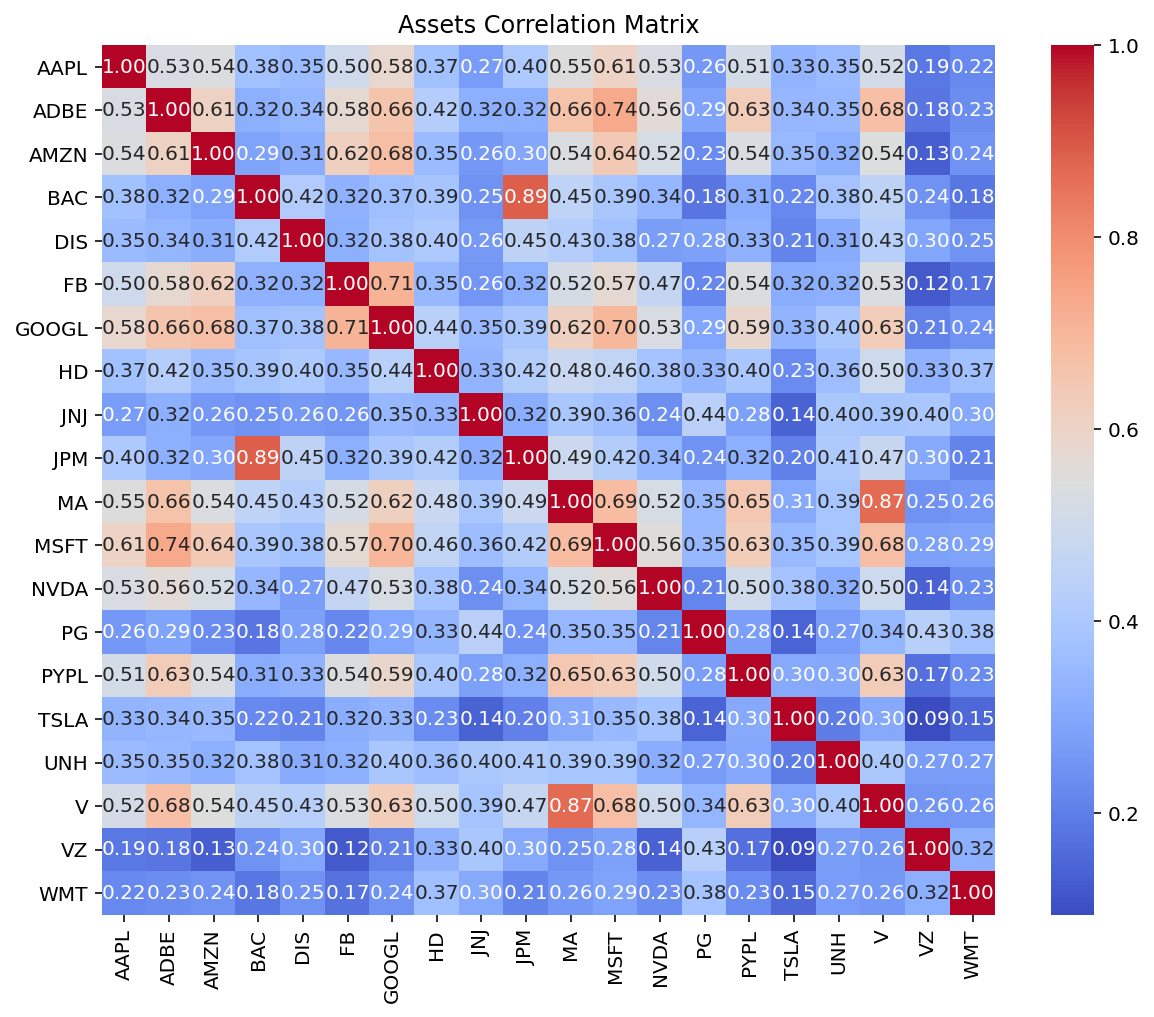

In [23]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(DF.pct_change().corr(method ='spearman'), ax=ax, cmap='coolwarm', annot=True, fmt=".2f")
ax.set_title('Assets Correlation Matrix')
plt.savefig('./images/chart1.png', bbox_inches='tight')

In [12]:
# calculate prior - market implied retunrs
market_prior = pyp.black_litterman.market_implied_prior_returns(mcap_dict, delta.values, S)
market_prior.name = 'Prior'
print(market_prior)

AAPL     0.243262
ADBE     0.245198
AMZN     0.226821
BAC      0.212325
DIS      0.162547
FB       0.231753
GOOGL    0.217697
HD       0.178026
JNJ      0.116752
JPM      0.188936
MA       0.226250
MSFT     0.241581
NVDA     0.304341
PG       0.113338
PYPL     0.241894
TSLA     0.295582
UNH      0.174301
V        0.207811
VZ       0.087892
WMT      0.105941
Name: Prior, dtype: float64


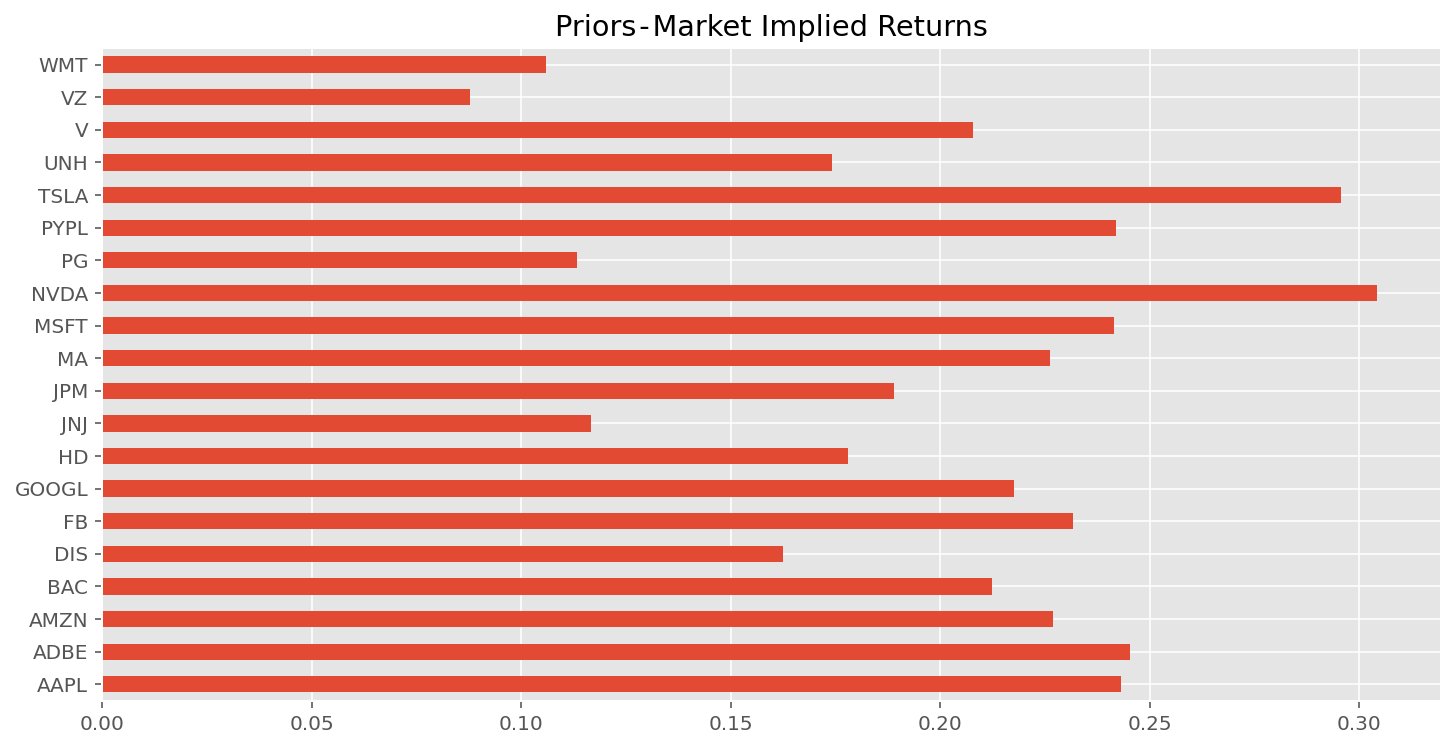

In [35]:
# plot prior
market_prior.plot.barh(figsize=(12,6), title = 'Priors - Market Implied Returns',grid=True);
plt.savefig('./images/chart2', bbox_inches='tight')

**Critical Point: how to generate views?**

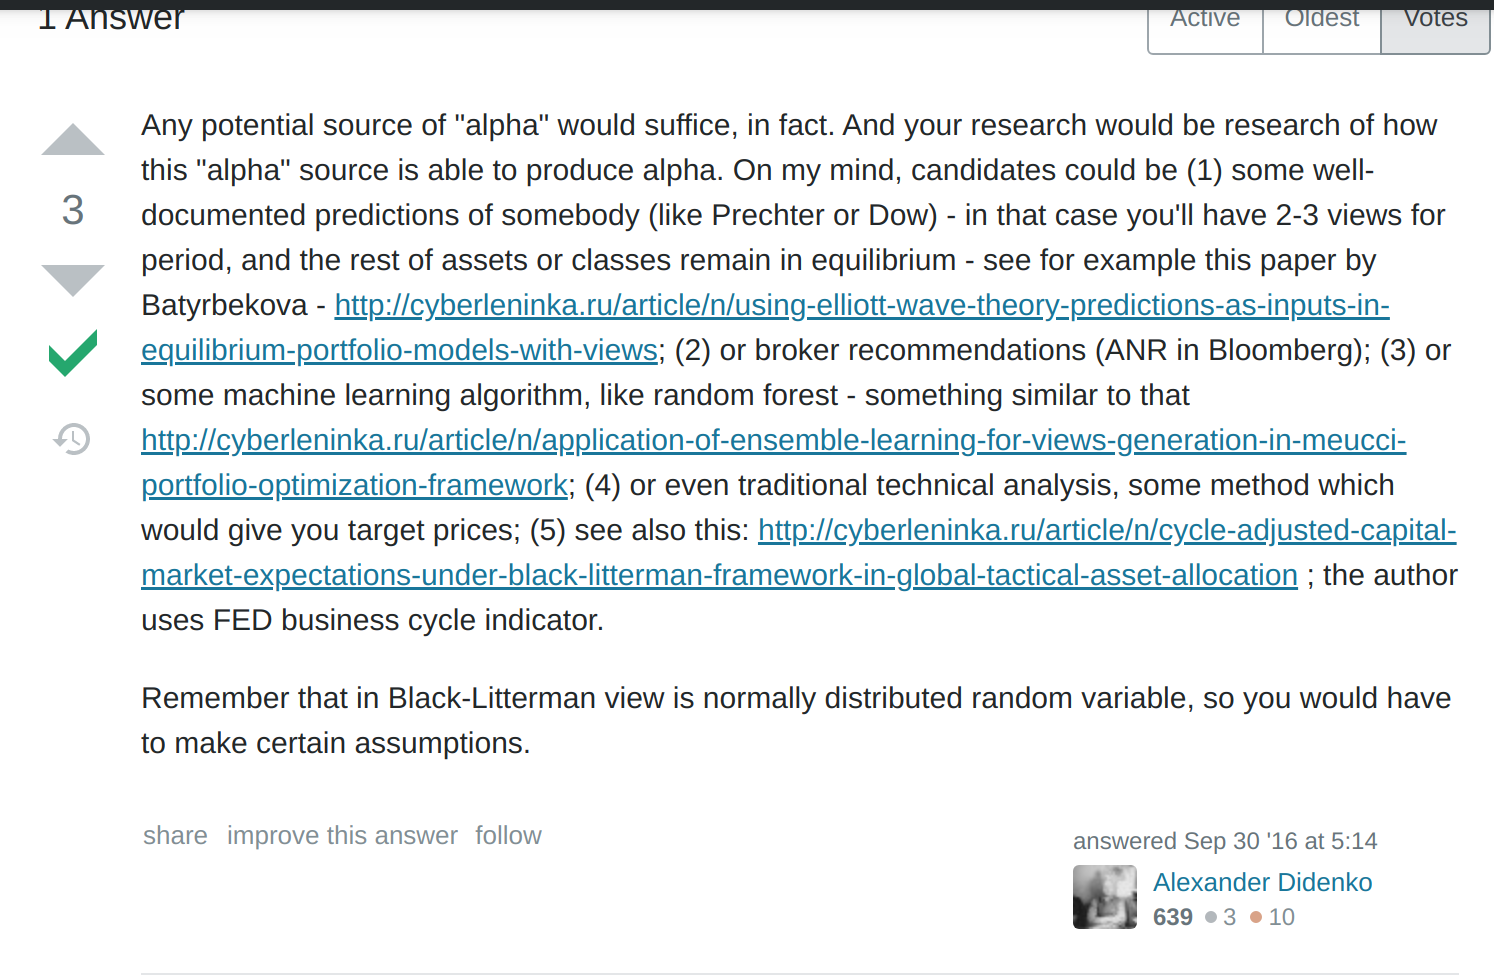

> To simplify our questions, and since our prices ranges from 2015-9-30 to 2020-9-30, we may choose the average return between 2020-10-01 to 2020-12-01, and convert it into annual return simply by multipling 6 as our views. And we can assign a high confidences to those, say, more than 0.9.

> In real Case, if our prices ranges from past to now, then we may perform some machine learning algorithm to pridict average return of certain future period and convert it into annual return as our views, and can assign confidences respectively according to the prediction standard deviation.

In [11]:
#Data for creating views
# Date range
start = '2020-10-01'
end = '2020-12-01'
# Downloading data
prices_for_views = yf.download(Symbol, start = start, end = end)
prices_for_views = prices_for_views.dropna()

[*********************100%***********************]  20 of 20 completed


In [12]:
prices_for_views['Adj Close']

,AAPL,ADBE,AMZN,BAC,DIS,FB,GOOGL,HD,JNJ,JPM,MA,MSFT,NVDA,PG,PYPL,TSLA,UNH,V,VZ,WMT
Date,,,,,,,,,,,,,,,,,,,,
2020-09-30,115.610542,490.429993,3148.729980,23.940784,124.080002,261.899994,1465.599976,276.203979,147.852615,95.384888,337.776672,209.780777,541.060120,138.222519,197.029999,429.010010,310.652313,199.669144,58.863266,139.400452
2020-10-01,116.588860,499.510010,3221.260010,23.950724,123.309998,266.630005,1487.900024,276.114471,146.303391,96.078461,342.970612,211.905228,544.419189,138.471146,196.940002,448.160004,311.947662,203.044067,58.823689,142.558899
2020-10-02,112.825348,478.989990,3125.000000,24.060041,122.550003,259.940002,1455.599976,277.795288,145.230835,96.989998,338.435883,205.651596,522.335693,137.357315,191.910004,415.089996,310.861572,201.156921,58.615902,139.988297
2020-10-05,116.299355,486.470001,3199.199951,24.467503,123.370003,264.649994,1482.829956,280.570160,147.207092,99.040001,342.850769,209.830658,545.538818,138.620316,196.850006,425.679993,317.009460,203.233765,59.031475,141.283569
2020-10-06,112.965111,478.980011,3099.959961,24.219051,120.930000,258.660004,1451.020020,274.970703,145.250687,98.019997,337.037506,205.372330,549.297729,138.839096,191.660004,413.980011,313.322723,200.148422,58.833580,140.117828
2020-10-07,114.881805,493.149994,3195.689941,24.725891,122.910004,258.119995,1459.140015,281.256439,146.859512,99.730003,343.500000,209.282089,558.395020,139.923080,194.610001,425.299988,322.011475,202.165390,58.982002,140.376877
2020-10-08,114.771988,490.839996,3190.550049,25.083662,123.089996,263.760010,1483.430054,282.977020,147.862534,101.779999,345.149994,210.030136,553.386475,140.867828,193.059998,425.920013,321.254181,202.674622,59.189999,140.845169
2020-10-09,116.768547,502.160004,3286.649902,25.202919,124.980003,264.450012,1510.449951,284.369476,149.928192,101.199997,352.390015,215.246475,550.347412,142.130814,197.270004,434.000000,326.664703,206.329117,59.330002,142.259995
2020-10-12,124.185753,510.890015,3442.929932,25.520937,124.970001,275.750000,1564.589966,285.354095,150.792175,102.440002,352.040009,220.821869,568.871887,143.692154,201.509995,442.299988,328.787079,206.089462,59.549999,143.724640


In [13]:
#save to csv for future use
prices_for_views['Adj Close'].to_csv('prices_for_views.csv')

In [15]:
df = pd.read_csv('prices_for_views.csv', parse_dates=['Date'])
df.set_index('Date', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43 entries, 2020-09-30 to 2020-11-30
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    43 non-null     float64
 1   ADBE    43 non-null     float64
 2   AMZN    43 non-null     float64
 3   BAC     43 non-null     float64
 4   DIS     43 non-null     float64
 5   FB      43 non-null     float64
 6   GOOGL   43 non-null     float64
 7   HD      43 non-null     float64
 8   JNJ     43 non-null     float64
 9   JPM     43 non-null     float64
 10  MA      43 non-null     float64
 11  MSFT    43 non-null     float64
 12  NVDA    43 non-null     float64
 13  PG      43 non-null     float64
 14  PYPL    43 non-null     float64
 15  TSLA    43 non-null     float64
 16  UNH     43 non-null     float64
 17  V       43 non-null     float64
 18  VZ      43 non-null     float64
 19  WMT     43 non-null     float64
dtypes: float64(20)
memory usage: 7.1 KB


In [90]:
views_mu = pyp.expected_returns.mean_historical_return(df)

In [91]:
views_mu

AAPL     0.192317
ADBE    -0.137685
AMZN     0.037365
BAC      1.551380
DIS      1.880949
FB       0.398890
GOOGL    1.942246
HD      -0.006464
JNJ     -0.122036
JPM      2.562569
MA      -0.022290
MSFT     0.129122
NVDA    -0.055858
PG       0.028437
PYPL     0.647211
TSLA     4.363517
UNH      0.576396
V        0.367066
VZ       0.168387
WMT      0.696199
dtype: float64

In [40]:
views = df.pct_change().dropna().apply(np.mean)*6
views = pd.DataFrame(views)
views.columns=['View']
views.loc[:, 'Confidence'] = 0.9
views

,View,Confidence
AAPL,0.005806,0.9
ADBE,-0.001905,0.9
AMZN,0.002627,0.9
BAC,0.024999,0.9
DIS,0.027196,0.9
FB,0.010220,0.9
GOOGL,0.026942,0.9
HD,0.000473,0.9
JNJ,-0.002695,0.9
JPM,0.032540,0.9


In [41]:
# create view dict
views_dict = {ind : views['View'][ind] for ind in views.index}
print(views_dict)

{'AAPL': 0.005806394756164719, 'ADBE': -0.001905067675194383, 'AMZN': 0.002626946584062151, 'BAC': 0.024999013908137552, 'DIS': 0.027196263940070336, 'FB': 0.010219648769826555, 'GOOGL': 0.02694178959421751, 'HD': 0.00047301300499258403, 'JNJ': -0.0026945114616726074, 'JPM': 0.0325401565074582, 'MA': 0.0014556310886189821, 'MSFT': 0.0039721392447769534, 'NVDA': 0.0009868950340698379, 'PG': 0.0010488013383287737, 'PYPL': 0.01488525937643053, 'TSLA': 0.043920086113983174, 'UNH': 0.01221888514770943, 'V': 0.008476824486852228, 'VZ': 0.00392168705132109, 'WMT': 0.012977010820499846}


***Run the BL Model***

In [42]:
# run the Bl model
bl = pyp.BlackLittermanModel(S, pi=market_prior, absolute_views=views_dict)

In [43]:
# Posterior estimate of returns
bl_return = bl.bl_returns()
bl_return.name = 'Posterior'

In [44]:
# get historical returns
mu = pyp.expected_returns.mean_historical_return(DF)
mu.name = 'Historical'
# print(mu)

In [45]:
# create returns dataframe
returns_df = pd.DataFrame([market_prior, mu, bl_return, pd.Series(views_dict)], 
             index=['Prior', 'Historical','Posterior', 'Views']).T
print(returns_df)

          Prior  Historical  Posterior     Views
AAPL   0.243262    0.353959   0.041922  0.005806
ADBE   0.245198    0.429694   0.025724 -0.001905
AMZN   0.226821    0.438524   0.039474  0.002627
BAC    0.212325    0.112092   0.031776  0.024999
DIS    0.162547    0.053125   0.027911  0.027196
FB     0.231753    0.238651   0.035062  0.010220
GOOGL  0.217697    0.180989   0.035752  0.026942
HD     0.178026    0.219825   0.019486  0.000473
JNJ    0.116752    0.128081   0.012770 -0.002695
JPM    0.188936    0.127866   0.029587  0.032540
MA     0.226250    0.311490   0.024161  0.001456
MSFT   0.241581    0.392512   0.032463  0.003972
NVDA   0.304341    0.865187   0.032737  0.000987
PG     0.113338    0.176456   0.013485  0.001049
PYPL   0.241894    0.447604   0.027848  0.014885
TSLA   0.295582    0.539593   0.067388  0.043920
UNH    0.174301    0.238347   0.022014  0.012219
V      0.207811    0.243973   0.023508  0.008477
VZ     0.087892    0.113549   0.013014  0.003922
WMT    0.105941    0

In [47]:
# write it for future reference
returns_df.to_csv('returns.csv', header=True,)
returns_df = pd.read_csv('returns.csv', index_col=[0])

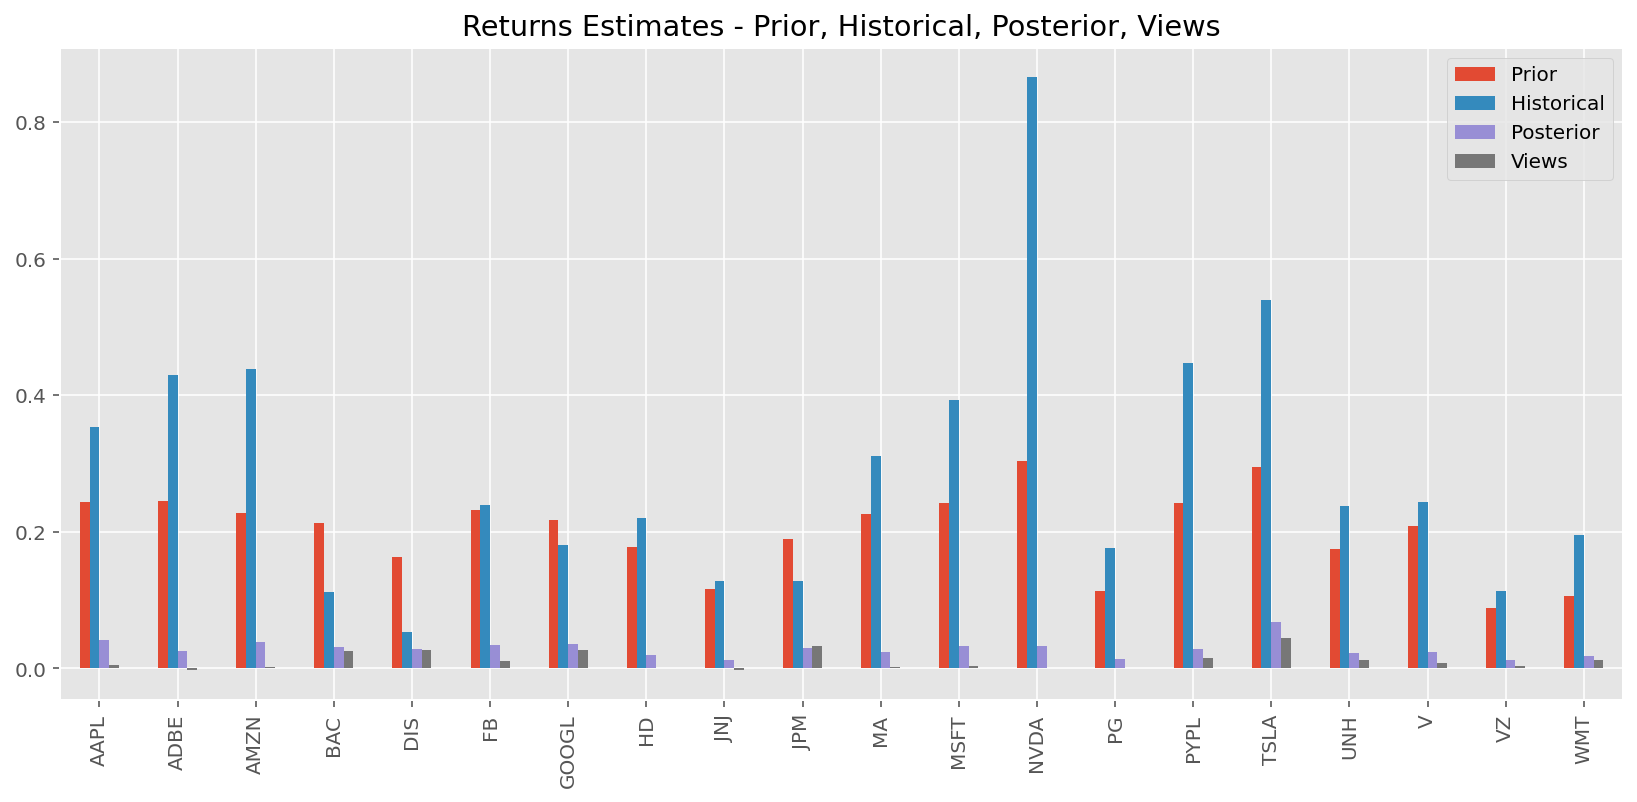

In [48]:
# plot the returns
returns_df.plot.bar(figsize=(14,6), title = 'Returns Estimates - Prior, Historical, Posterior, Views', grid=True);
plt.savefig('./images/chart3', bbox_inches='tight')

In [38]:
DF.pct_change().tail()

,AAPL,ADBE,AMZN,BAC,DIS,FB,GOOGL,HD,JNJ,JPM,MA,MSFT,NVDA,PG,PYPL,TSLA,UNH,V,VZ,WMT
Date,,,,,,,,,,,,,,,,,,,,
2020-09-24,0.010269,-0.005782,0.006644,0.003439,-0.006408,0.002048,0.009557,-0.003189,0.001592,-0.000863,0.011339,0.012962,0.018497,0.004475,0.003194,0.019534,0.001780,0.000768,0.004753,0.005221
2020-09-25,0.037516,0.025894,0.024949,0.006427,0.012328,0.021200,0.011386,0.010726,0.006843,0.008742,0.010877,0.022787,0.042578,0.005112,0.027773,0.050414,0.033623,0.008848,0.003379,0.004170
2020-09-28,0.023869,0.018196,0.025498,0.025543,0.016048,0.007849,0.013620,0.014076,0.009955,0.028779,0.019923,0.007795,0.012526,0.002834,0.025474,0.034026,0.002413,0.015564,-0.000505,-0.000146
2020-09-29,-0.007568,0.001679,-0.009190,-0.013283,-0.004683,0.019352,0.005046,-0.000808,-0.000340,-0.008424,-0.006383,-0.010409,0.014634,-0.005434,0.012915,-0.005057,0.003034,-0.004393,-0.002022,-0.000801
2020-09-30,0.015076,0.002248,0.001224,0.013462,-0.010526,0.000420,-0.000287,0.020580,0.012376,0.009649,0.005770,0.014812,0.023042,0.012604,0.013008,0.023719,0.025053,0.002657,0.004220,0.020198


In [49]:
# get the covariance matrix
S_bl = bl.bl_cov()
S_bl.to_csv('S_bl.csv')
S_bl = pd.read_csv('S_bl.csv',  index_col=[0])

**Confidence matrix for analyst views**

In [53]:
# create confidences vector
confidences = list(views.Confidence)
print(confidences)

[0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9]


In [54]:
# use Idzorek's method and run the model
bl_confi = pyp.BlackLittermanModel(S, pi=market_prior, 
                                   absolute_views=views_dict, 
                                   omega="idzorek", view_confidences=confidences)

In [55]:
# Posterior estimate of returns
bl_return_confi = bl_confi.bl_returns()
bl_return_confi.name = 'Posterior_confidence'

In [56]:
returns_df = pd.DataFrame([market_prior, mu, bl_return, pd.Series(views_dict), bl_return_confi], 
             index=['Prior', 'Historical','Posterior', 'Views', 'Posterior_confidence']).T
print(returns_df)

          Prior  Historical  Posterior     Views  Posterior_confidence
AAPL   0.243262    0.353959   0.041922  0.005806              0.012767
ADBE   0.245198    0.429694   0.025724 -0.001905              0.001837
AMZN   0.226821    0.438524   0.039474  0.002627              0.009460
BAC    0.212325    0.112092   0.031776  0.024999              0.027040
DIS    0.162547    0.053125   0.027911  0.027196              0.025924
FB     0.231753    0.238651   0.035062  0.010220              0.013792
GOOGL  0.217697    0.180989   0.035752  0.026942              0.024741
HD     0.178026    0.219825   0.019486  0.000473              0.004093
JNJ    0.116752    0.128081   0.012770 -0.002695             -0.000029
JPM    0.188936    0.127866   0.029587  0.032540              0.028780
MA     0.226250    0.311490   0.024161  0.001456              0.005752
MSFT   0.241581    0.392512   0.032463  0.003972              0.008779
NVDA   0.304341    0.865187   0.032737  0.000987              0.004565
PG    

In [57]:
# write it for future reference
returns_df.to_csv('returns.csv', header=True,)
returns_df = pd.read_csv('returns.csv', index_col=[0],)

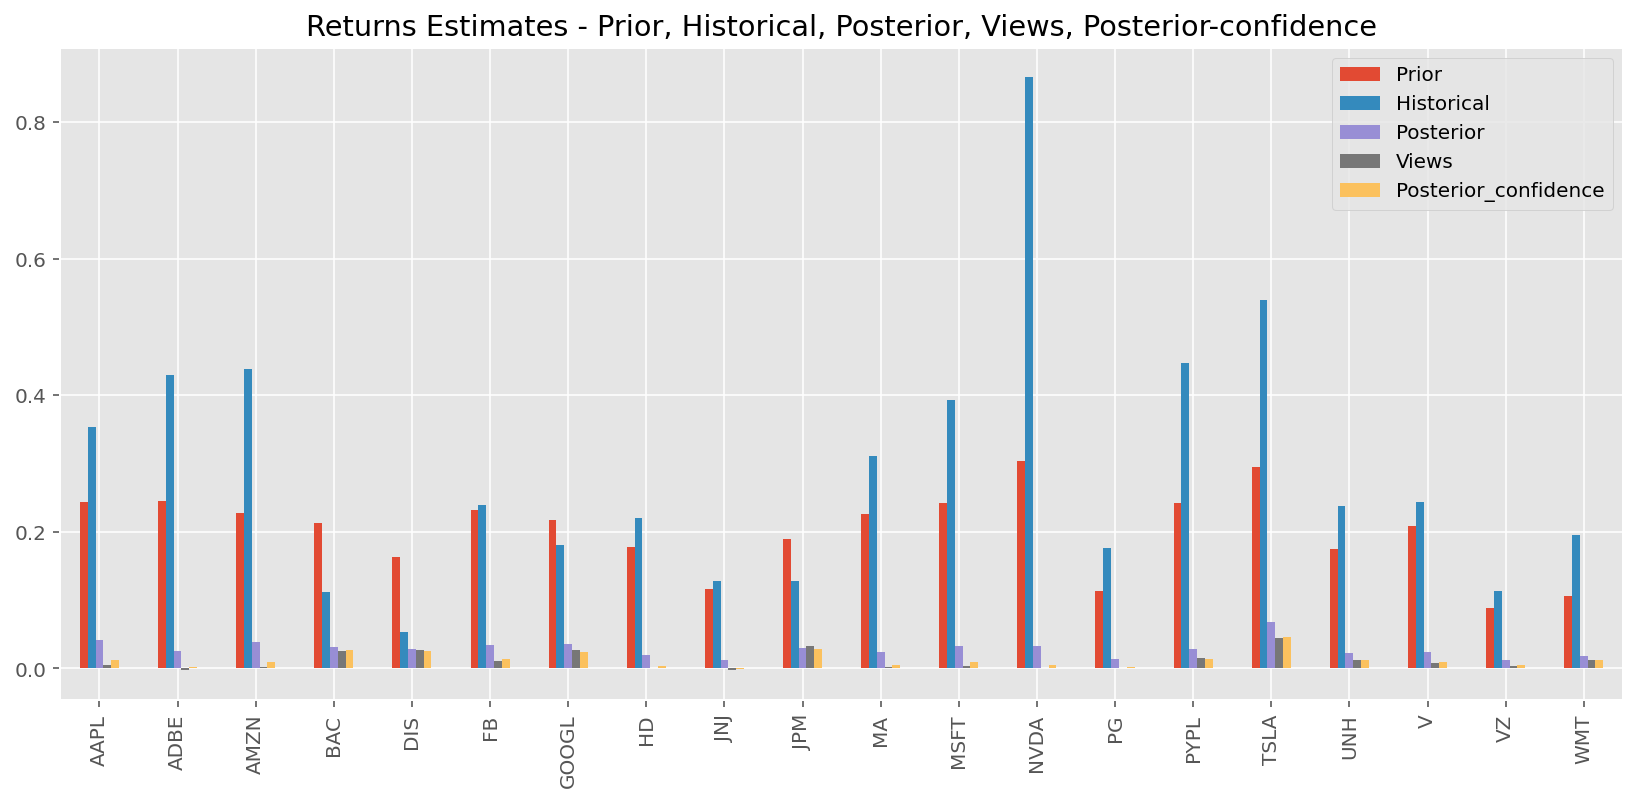

In [58]:
returns_df.plot.bar(figsize=(14,6), 
                    title = 'Returns Estimates - Prior, Historical, Posterior, Views, Posterior-confidence', grid=True);
plt.savefig('./images/chart4', bbox_inches='tight')

In [59]:
# get the covariance matrix
S_bl_confi = bl_confi.bl_cov()
S_bl_confi.to_csv('S_bl_confi.csv')
S_bl_confi = pd.read_csv('S_bl_confi.csv',  index_col=[0])
S_bl_confi

,AAPL,ADBE,AMZN,BAC,DIS,FB,GOOGL,HD,JNJ,JPM,MA,MSFT,NVDA,PG,PYPL,TSLA,UNH,V,VZ,WMT
AAPL,0.088692,0.057554,0.050262,0.049696,0.036820,0.052892,0.049556,0.040599,0.024499,0.043711,0.054092,0.056976,0.075796,0.024604,0.057183,0.064030,0.040545,0.048115,0.016116,0.022353
ADBE,0.057554,0.102316,0.058742,0.048231,0.036593,0.059849,0.057086,0.044399,0.026346,0.042722,0.060886,0.067406,0.084009,0.023462,0.069839,0.071658,0.041275,0.057171,0.016511,0.023289
AMZN,0.050262,0.058742,0.091114,0.034117,0.027140,0.058873,0.052232,0.031349,0.019129,0.028303,0.044747,0.055291,0.069348,0.017359,0.053368,0.062248,0.030512,0.038915,0.011528,0.017693
BAC,0.049696,0.048231,0.034117,0.116335,0.052816,0.044579,0.043961,0.048880,0.028122,0.091930,0.059135,0.050816,0.065614,0.026297,0.051003,0.053427,0.049723,0.054905,0.022227,0.019901
DIS,0.036820,0.036593,0.027140,0.052816,0.070119,0.033819,0.034168,0.037338,0.020095,0.047689,0.044713,0.036939,0.045560,0.021605,0.040664,0.042583,0.031649,0.039859,0.017663,0.016463
FB,0.052892,0.059849,0.058873,0.044579,0.033819,0.104549,0.057330,0.038319,0.021304,0.038361,0.053159,0.054692,0.070523,0.018820,0.061938,0.059214,0.035312,0.047123,0.013569,0.016169
GOOGL,0.049556,0.057086,0.052232,0.043961,0.034168,0.057330,0.068843,0.037212,0.023057,0.038777,0.050411,0.055568,0.067231,0.021303,0.055394,0.055114,0.036782,0.047013,0.015315,0.017654
HD,0.040599,0.044399,0.031349,0.048880,0.037338,0.038319,0.037212,0.065739,0.022521,0.045066,0.045341,0.042969,0.057978,0.023420,0.045808,0.049473,0.038813,0.042715,0.019687,0.022957
JNJ,0.024499,0.026346,0.019129,0.028122,0.020095,0.021304,0.023057,0.022521,0.040437,0.026435,0.027230,0.027623,0.029100,0.022390,0.025588,0.018749,0.027940,0.025505,0.018024,0.017334
JPM,0.043711,0.042722,0.028303,0.091930,0.047689,0.038361,0.038777,0.045066,0.026435,0.088804,0.052844,0.045090,0.054346,0.024431,0.044612,0.045175,0.044635,0.048763,0.021565,0.018602


**Portfolio weights**

In [61]:
# Long-only minimum volatility portfolio, with a weight cap of 10% and regularisation
ef = pyp.EfficientFrontier(bl_return_confi, S_bl_confi, weight_bounds=(0, 0.1), gamma=0)
ef.add_objective(pyp.objective_functions.L2_reg, gamma=0.1)
weights = ef.min_volatility()
ef.portfolio_performance(verbose=True), print('\n')
wt_min_vola = pd.DataFrame([weights],columns=weights.keys()).T * 100

# write it to csv for part 2
wt_min_vola.to_csv('wt_min_vola_wts.csv')
wt_min_vola = pd.read_csv('wt_min_vola_wts.csv',  index_col=[0])

print ('Weights in Percentage ********************')
print(wt_min_vola.round(4))

Expected annual return: 1.1%
Annual volatility: 17.4%
Sharpe Ratio: -0.05


Weights in Percentage ********************
             0
AAPL    3.5262
ADBE    1.3356
AMZN    7.3145
BAC     0.6198
DIS     9.0393
FB      4.3521
GOOGL   5.7134
HD      7.0999
JNJ    10.0000
JPM     4.4318
MA      1.7133
MSFT    1.5591
NVDA    0.0000
PG     10.0000
PYPL    1.0626
TSLA    0.7622
UNH     6.8790
V       4.5912
VZ     10.0000
WMT    10.0000


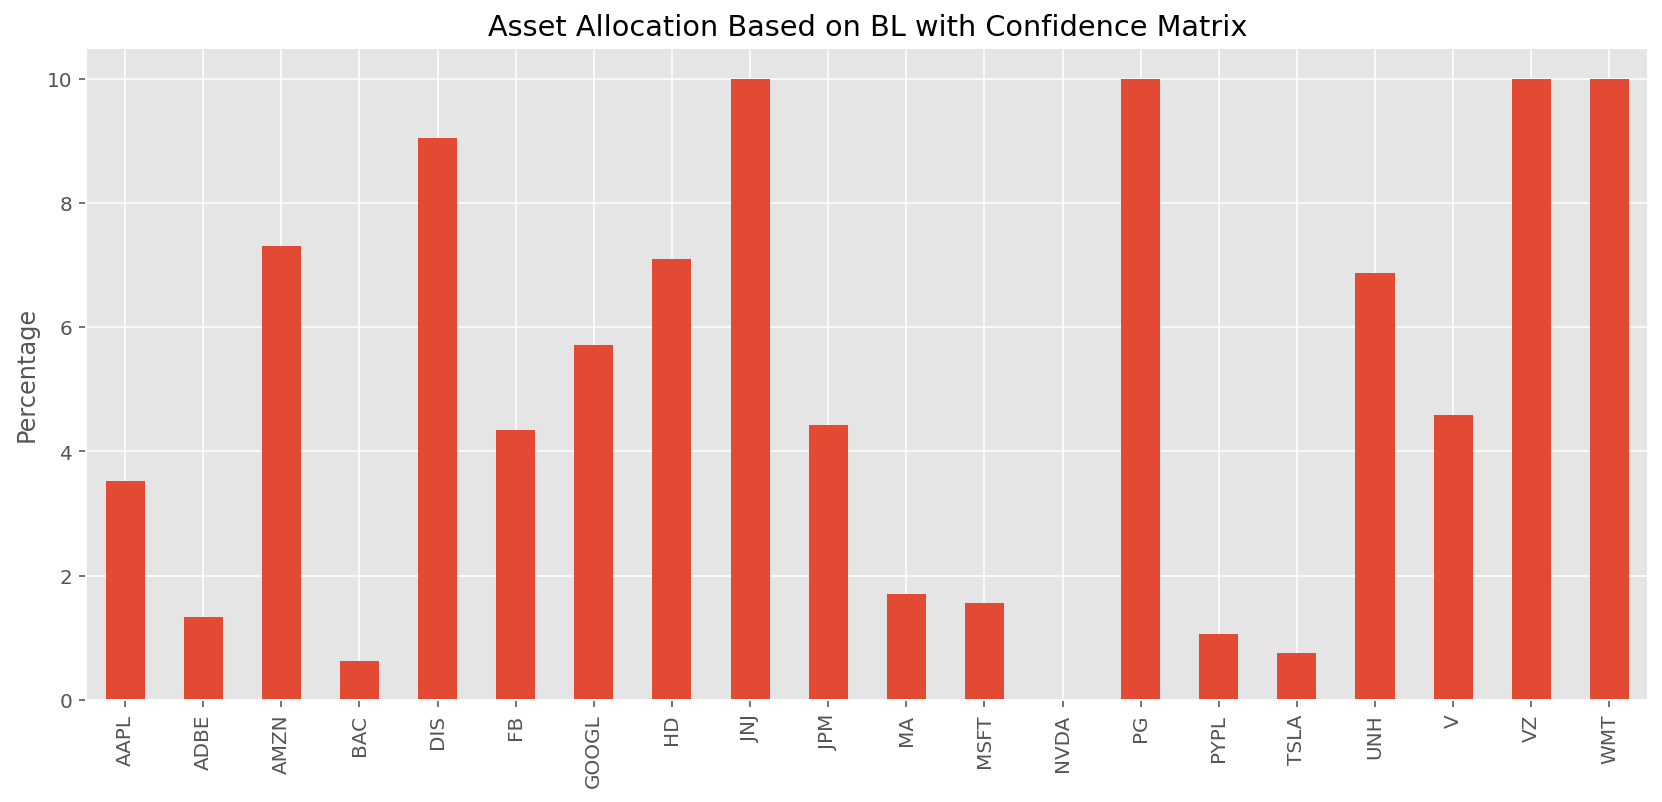

In [62]:
# plot the weights
wt_min_vola.plot.bar(figsize=(14,6), 
                    title = 'Asset Allocation Based on BL with Confidence Matrix', grid=True,legend=False);
plt.ylabel('Percentage')
plt.savefig('./images/chart5', bbox_inches='tight')

# Backtest Porfolio from Black–Litterman model for Asset Allocation - Backtrader

In [65]:
import pandas_datareader.data as web
import pyfolio as pf
import backtrader as bt

In [66]:
# Read our 20 tickers weights
wt_min_vola = pd.read_csv('wt_min_vola_wts.csv',  index_col=[0])
print(wt_min_vola)

               0
AAPL    3.526154
ADBE    1.335593
AMZN    7.314525
BAC     0.619815
DIS     9.039331
FB      4.352058
GOOGL   5.713447
HD      7.099903
JNJ    10.000000
JPM     4.431814
MA      1.713268
MSFT    1.559144
NVDA    0.000000
PG     10.000000
PYPL    1.062627
TSLA    0.762195
UNH     6.878976
V       4.591152
VZ     10.000000
WMT    10.000000


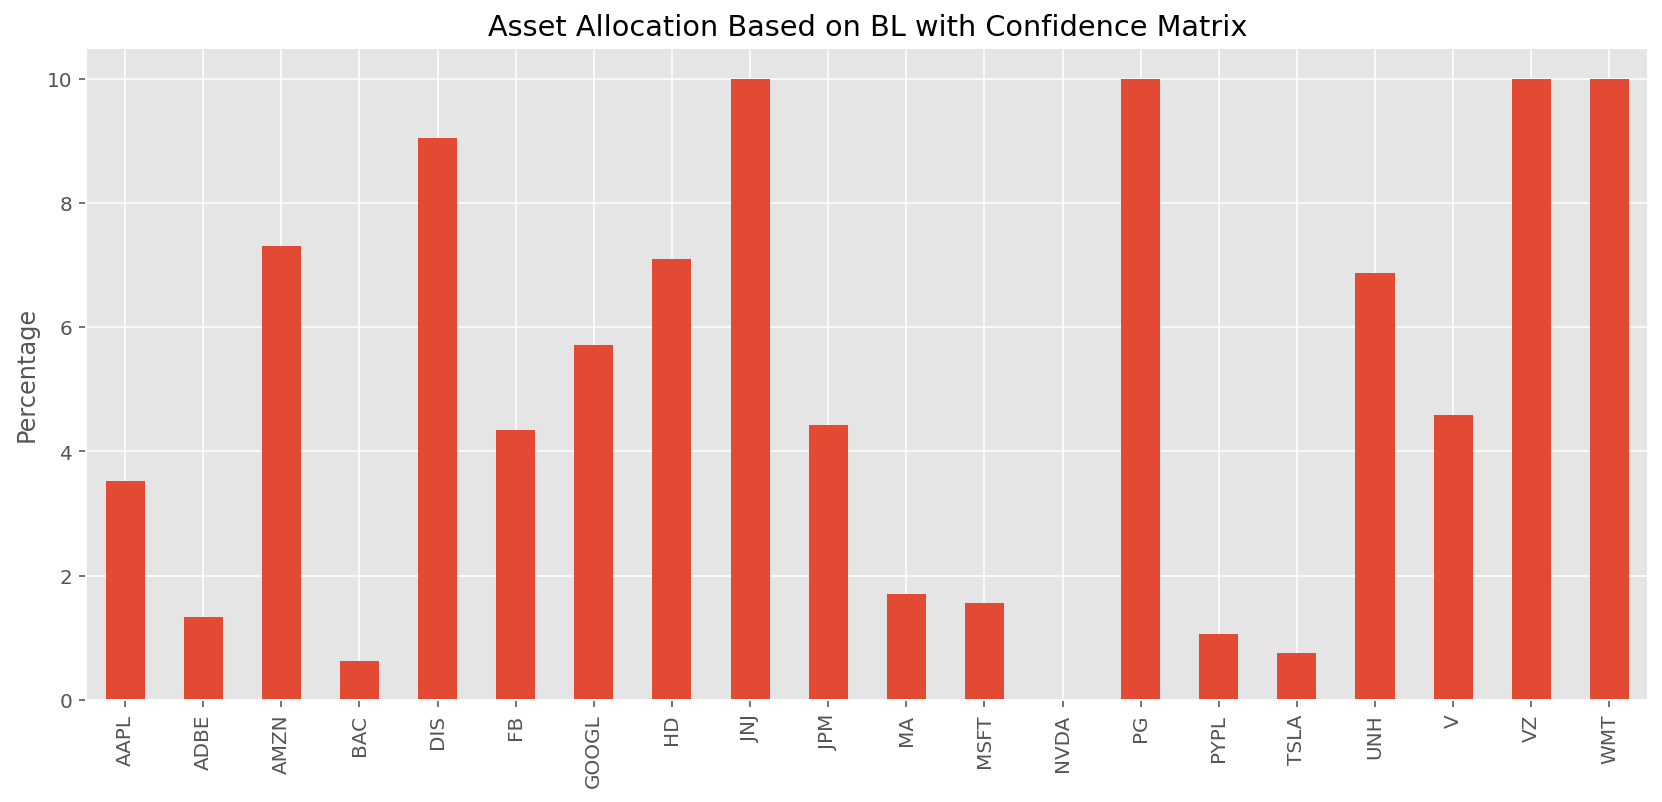

In [67]:
# plot the weights
wt_min_vola.plot.bar(figsize=(14,6), 
                    title = 'Asset Allocation Based on BL with Confidence Matrix', grid=True,legend=False);
plt.ylabel('Percentage')
plt.savefig('./images/chart6', dpi=300)

In [69]:
# date range for the backtesting
fromdate=datetime.datetime(2015, 9, 30)
todate=datetime.datetime(2020, 9, 30)

In [70]:
# create a tuple list of ticker and weight
assets_param = [(ind, wt_min_vola.loc[ind][0]) for ind in wt_min_vola.index]
print(assets_param)

[('AAPL', 3.52615395254101), ('ADBE', 1.33559306650202), ('AMZN', 7.314524797369398), ('BAC', 0.61981547635111), ('DIS', 9.03933053424478), ('FB', 4.35205785916016), ('GOOGL', 5.7134467373983), ('HD', 7.09990340118882), ('JNJ', 10.0), ('JPM', 4.43181367456811), ('MA', 1.7132676990937799), ('MSFT', 1.5591436604058302), ('NVDA', 0.0), ('PG', 10.0), ('PYPL', 1.06262676852697), ('TSLA', 0.7621952446597199), ('UNH', 6.87897561711839), ('V', 4.591151510871599), ('VZ', 10.0), ('WMT', 10.0)]


In [71]:
# define the strategy
class Strategy(bt.Strategy):
    # parameters for inputs    
    params = dict(
        assets = [],
        rebalance_months = [1,3,6,9]
    )
 
    # initialize
    def __init__(self):
        # create a dictionary of ticker:{'rebalanced': False, 'target_percent': target%}
        self.rebalance_dict = dict()
        for i, d in enumerate(self.datas):
            self.rebalance_dict[d] = dict()
            self.rebalance_dict[d]['rebalanced'] = False
            for asset in self.p.assets:
                if asset[0] == d._name:
                    self.rebalance_dict[d]['target_percent'] = asset[1]
 
    def next(self):
        # rebalance for the month in the list
        for i, d in enumerate(self.datas):
            dt = d.datetime.datetime()
            dname = d._name
            pos = self.getposition(d).size
 
            if dt.month in self.p.rebalance_months and self.rebalance_dict[d]['rebalanced'] == False:
                print('{} Sending Order: {} | Month {} | Rebalanced: {} | Pos: {}'.
                      format(dt, dname, dt.month,
                             self.rebalance_dict[d]['rebalanced'], pos ))
            
                self.order_target_percent(d, target=self.rebalance_dict[d]['target_percent']/100)
                self.rebalance_dict[d]['rebalanced'] = True
 
            # Reset the flage
            if dt.month not in self.p.rebalance_months:
                self.rebalance_dict[d]['rebalanced'] = False
                
    # notify the order if completed
    def notify_order(self, order):
        date = self.data.datetime.datetime().date()
 
        if order.status == order.Completed:
            print('{} >> Order Completed >> Stock: {},  Ref: {}, Size: {}, Price: {}'.
                  format(date, order.data._name, order.ref, order.size,
                         'NA' if not order.price else round(order.price,5)
                        ))

    # notify the trade if completed        
    def notify_trade(self, trade):
        date = self.data.datetime.datetime().date()
        if trade.isclosed:
            print('{} >> Notify Trade >> Stock: {}, Close Price: {}, Profit, Gross {}, Net {}'.
                  format(date, trade.data._name, trade.price, round(trade.pnl,2),round(trade.pnlcomm,2))
                 )

In [72]:
# starting cash
startcash = 10000

# 0.5% commission
commission = 0.005

#Create an instance of cerebro
cerebro = bt.Cerebro()

cerebro.broker.setcash(startcash)

# orders will not be checked to see if you can afford it before submitting them
cerebro.broker.set_checksubmit(False)

cerebro.broker.setcommission(commission=commission)

In [73]:
wt_min_vola

,0
AAPL,3.526154
ADBE,1.335593
AMZN,7.314525
BAC,0.619815
DIS,9.039331
FB,4.352058
GOOGL,5.713447
HD,7.099903
JNJ,10.000000
JPM,4.431814


In [76]:
DF.head()

,AAPL,ADBE,AMZN,BAC,DIS,FB,GOOGL,HD,JNJ,JPM,MA,MSFT,NVDA,PG,PYPL,TSLA,UNH,V,VZ,WMT
Date,,,,,,,,,,,,,,,,,,,,
2015-09-30,25.438564,82.220001,511.890015,14.080485,95.805756,89.900002,638.369995,102.349243,80.972130,52.287682,87.150780,40.118252,24.027483,61.373466,31.040001,49.680000,106.765495,67.086021,34.394016,57.062309
2015-10-01,25.272509,83.750000,520.719971,14.053372,96.246346,90.949997,642.000000,103.714027,80.816002,52.673599,87.740677,40.435497,23.559608,61.381996,31.480000,47.976002,107.317657,67.403831,33.959248,56.560680
2015-10-02,25.457008,83.989998,532.539978,13.899734,96.555710,92.070000,656.989990,104.405273,81.475235,52.526756,89.036537,41.305664,24.173697,61.782970,32.830002,49.514000,109.360764,68.058701,33.864388,57.185535
2015-10-05,25.549263,85.839996,543.679993,14.179896,97.352524,94.010002,671.679993,105.637115,82.195168,53.571934,91.222076,42.266476,24.778042,62.465469,32.669998,49.230000,110.115417,69.561058,34.781357,57.968769
2015-10-06,25.671497,85.150002,537.479980,14.179896,97.277527,92.800003,671.640015,105.176300,81.032860,53.597855,90.825562,42.375244,25.099699,62.619034,31.860001,48.292000,106.802277,69.416595,34.828785,57.801559


In [ ]:
# load the data
for ticker, data in prices.groupby(level=0):
    if ticker in TICKERS:
        print(f"Adding ticker: {ticker}")
        data = bt.feeds.PandasData(dataname=data.droplevel(level=0),
                                   name=str(ticker),
                                   fromdate=fromdate,
                                   todate=todate,
                                   plot=False)
        cerebro.adddata(data)

In [77]:
# Date range
start = '2015-10-01'
end = '2020-10-01'
# Downloading data
prices = yf.download(Symbol, start = start, end = end)
prices = prices.dropna()

[*********************100%***********************]  20 of 20 completed


In [82]:
# Date range
start = '2015-10-01'
end = '2020-10-01'
# get market daily prices - S&P500
market_prices = yf.download("SPY", start=start, end=end)
market_prices = market_prices.dropna()

[*********************100%***********************]  1 of 1 completed


In [84]:
# Creating Assets bt.feeds
assets_prices = []
for i in Symbol:
    prices_ = prices.drop(columns='Adj Close').loc[:, (slice(None), i)].dropna()
    prices_.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
    assets_prices.append(bt.feeds.PandasData(dataname=prices_, plot=False))#bt.feeds
# Creating Benchmark bt.feeds        
prices_ = market_prices.drop(columns='Adj Close').dropna()
prices_.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
benchmark = bt.feeds.PandasData(dataname=prices_, plot=False)#bt.feeds

In [87]:
#Add our strategy
cerebro.addstrategy(Strategy, assets=assets_param)

# add analyzers
cerebro.addanalyzer(bt.analyzers.Returns, _name='returns')
cerebro.addanalyzer(bt.analyzers.TimeReturn, _name='time_return')
cerebro.addanalyzer(bt.analyzers.PyFolio, _name='pyfolio')

In [88]:
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
# Run the strategy. 
results = cerebro.run(stdstats=True, tradehistory=False)
# Print out the final result
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 10000.00
Final Portfolio Value: 10000.00
